# Coffee Quality Prediction by Clustering



## 1.Introduction

This project aims to uncover patterns in coffee quality using unsupervised learning techniques, specifically clustering. By analyzing a dataset of coffee bean samples from the [Coffee Quality Institute (CQI)](https://www.kaggle.com/datasets/fatihb/coffee-quality-data-cqi), we seek to group coffees based on their chemical and sensory properties—revealing natural segments in quality and profile.

**Dataset**:  
The dataset, sourced from CQI via [Kaggle](https://www.kaggle.com/datasets/fatihb/coffee-quality-data-cqi), contains detailed information about over 1,300 coffee samples from around the world. Each sample includes attributes such as country, species, processing method, a range of cup quality scores (aroma, flavor, aftertaste, acidity, etc.), and an overall cup score.

**Objectives**:
- Explore the distribution and structure of coffee quality attributes.
- Apply clustering algorithms (e.g., KMeans) to identify distinct groups of coffee samples.
- Interpret the characteristics of each cluster to provide actionable insights for producers, buyers, or researchers.

**Why Clustering?**  
Clustering helps discover hidden patterns in unlabeled data. For the coffee industry, this means segmenting beans by quality profiles without pre-assigned grades—enabling targeted quality improvements and marketing strategies.

---

### Dataset description

Sensory evaluations (coffee quality scores)
- Aroma: Refers to the scent or fragrance of the coffee.
- Flavor: The flavor of coffee is evaluated based on the taste, including any sweetness, bitterness, acidity, and other flavor notes.
- Aftertaste: Refers to the lingering taste that remains in the mouth after swallowing the coffee.
- Acidity: Acidity in coffee refers to the brightness or liveliness of the taste.
- Body: The body of coffee refers to the thickness or viscosity of the coffee in the mouth.
- Balance: Balance refers to how well the different flavor components of the coffee work together.
- Uniformity: Uniformity refers to the consistency of the coffee from cup to cup.
Clean Cup: A clean cup refers to a coffee that is free of any off-flavors or defects, such as sourness, mustiness, or staleness.
- Sweetness: It can be described as caramel-like, fruity, or floral, and is a desirable quality in coffee.

PLEASE NOTE: 'Total Cup Points' is literally the total of 10 features given above. There were some notebooks trying to predict the total cup points given these features. We know the exact function underlying the total cup points.

## 2. Data Exploration

In [6]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

%matplotlib inline

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2.1 Preview Raw Data

In [8]:
# Load data
raw = pd.read_csv("/content/drive/MyDrive/2025_freshket/Data/df_arabica_clean.csv")
df = raw.copy()

df.head(3)

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"


In [9]:
# Check overall and unique per column
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,207.0,NaN,NaN,NaN,103.0,59.899917,0.0,51.5,103.0,154.5,206.0
ID,207.0,NaN,NaN,NaN,103.0,59.899917,0.0,51.5,103.0,154.5,206.0
Country of Origin,207,22,Taiwan,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Farm Name,205,172,Doi Tung Development Project,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Number,206,187,1,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mill,204,162,Dry Mill,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ICO Number,75,67,non,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Company,207,72,Taiwan Coffee Laboratory,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Altitude,206,97,1200,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,205,120,Chiayi,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    object 
 3   Farm Name              205 non-null    object 
 4   Lot Number             206 non-null    object 
 5   Mill                   204 non-null    object 
 6   ICO Number             75 non-null     object 
 7   Company                207 non-null    object 
 8   Altitude               206 non-null    object 
 9   Region                 205 non-null    object 
 10  Producer               206 non-null    object 
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    object 
 13  In-Country Partner     207 non-null    object 
 14  Harvest Year           207 non-null    object 
 15  Gradin

In [11]:
df.columns

Index(['Unnamed: 0', 'ID', 'Country of Origin', 'Farm Name', 'Lot Number',
       'Mill', 'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')

In [12]:
# Check duplicate
df.duplicated().any()

np.False_

In [13]:
# Check missing value
df.isna().sum().sort_values(ascending=False)

,0
ICO Number,132
Variety,6
Processing Method,5
Mill,3
Farm Name,2
Region,2
Producer,1
Altitude,1
Lot Number,1
Company,0


In [14]:
def calculate_missing_ratio(df, top_n=30):
    missing_ratios = (df.isnull().sum() / len(df)) * 100
    missing_ratios = missing_ratios[missing_ratios > 0].sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio': missing_ratios}).head(top_n)
    return missing_data

# Apply to the DataFrame
missing_data = calculate_missing_ratio(df, top_n=20)
missing_data.head(20)  # Display the result

,Missing Ratio
ICO Number,63.768116
Variety,2.898551
Processing Method,2.415459
Mill,1.449275
Farm Name,0.966184
Region,0.966184
Lot Number,0.483092
Altitude,0.483092
Producer,0.483092


#### Features Dictionary

1. **Unnamed: 0** – Index or row number from original CSV export
2. **ID** – Unique identifier for each coffee entry
3. **Country of Origin** – Country where the coffee was grown  
4. **Farm Name** – Name of the farm that produced the coffee  
5. **Lot Number** – Identifier for a specific batch or shipment  
6. **Mill** – Facility where the coffee was processed  
7. **ICO Number** – International Coffee Organization identifier  
8. **Company** – Company submitting or marketing the coffee  
9. **Altitude** – Altitude at which the coffee was grown  
10. **Region** – Geographic subregion within the country  
11. **Producer** – Name of the individual or organization producing the coffee  
12. **Number of Bags** – Total bags in the lot  
13. **Bag Weight** – Weight of each bag (kg)  
14. **In-Country Partner** – Local partner involved in the supply chain  
15. **Harvest Year** – Year the coffee was harvested  
16. **Grading Date** – Date the coffee was evaluated  
17. **Owner** – Owner of the farm or coffee lot  
18. **Variety** – Type of coffee bean
19. **Status** - only complete
20. **Processing Method** – How the coffee was processed
21. **Aroma** – Fragrance or scent of the coffee  
22. **Flavor** – Overall flavor profile including taste nuances  
23. **Aftertaste** – Flavor that remains after swallowing  
24. **Acidity** – Brightness or sharpness in the flavor  
25. **Body** – Mouthfeel or thickness of the coffee  
26. **Balance** – Harmony among all sensory attributes  
27. **Uniformity** – Consistency across cups  
28. **Clean Cup** – Absence of off-flavors or defects  
29. **Sweetness** – Pleasant sugar-like quality in flavor  
30. **Overall** – Final impression by the evaluator  
31. **Defects** – General count of flaws or issues in the coffee  
32. **Total Cup Points** – Sum of 10 sensory attributes (not a true label)  
33. **Moisture Percentage** – Moisture content of green coffee beans  
34. **Category One Defects** primary defects that can be perceived through visual inspection
35. **Quakers** – Unripe or improperly roasted beans  
36. **Color** – Visual appearance of beans  
37. **Category Two Defects** secondary defects that are more subtle and can only be detected through tasting.
38. **Expiration** – Date until which the sample is valid or accepted  
39. **Certification Body** – Organization that certified the coffee
40. **Certification Address** – Address of certification organization  
41. **Certification Contact** – Contact info for the certification body  

### 2.2 Data Cleaning & Feature Engineering

#### 1. Engineer new features

In [15]:
# Format date
def clean_date_string(date_str):
    return re.sub(r'(\d{1,2})(st|nd|rd|th)', r'\1', date_str)

df['Harvest Year'] = df['Harvest Year'].str.extract(r'(\d{4})').iloc[:, 0]
df['Harvest Year'] = pd.to_datetime(df['Harvest Year'], format='%Y')
df['Expiration'] = df['Expiration'].apply(clean_date_string)
df['Expiration'] = pd.to_datetime(df['Expiration'])

In [16]:
df['Coffee Age'] = (df['Expiration'] - df['Harvest Year']).dt.days

In [17]:
df.head(3)

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact,Coffee Age
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,11.8,0,0,green,3,2023-09-21,Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901,993
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,10.5,0,0,blue-green,0,2023-11-15,Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612",1048
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,10.4,0,0,yellowish,2,2023-11-15,Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612",1048


#### 2. Drop Irrelevant or Non-Predictive Columns

These columns were dropped as part of data cleaning and preprocessing for clustering and machine learning. Below is a justification for each:

- `'Unnamed: 0', 'ID'`: These are indexing and unique identifiers, which do not carry predictive information.
- `'Farm Name', 'Lot Number', 'Mill', 'Company', 'Producer', 'Owner'`: These are high-cardinality text fields representing specific locations or individuals. They are likely to introduce noise or overfitting if encoded and do not generalize well.
- `'ICO Number'`: This field has a `high percentage of missing values (nulls)` and minimal analytical relevance. (63.768 %)
- `'Region'`: Often redundant with 'Country of Origin' or inconsistently filled.
- `'Number of Bags', 'Bag Weight'`: Operational logistics data, unrelated to the quality or sensory aspects of the coffee.
- `'In-Country Partner'`: Administrative data with limited or no impact on the target or clustering variables.
- `'Harvest Year', 'Grading Date', 'Expiration'`: While possibly useful for time-series or freshness analysis, they are excluded here unless used to engineer features like `Coffee Age` (which we have already done).
- `'Variety'`: This feature represents the coffee bean variety as a `categorical label`. However, it contains **48 unique categories across only 207 samples**
- `'Status'`: This column has only one unique value across the entire dataset
- `'Uniformity', 'Clean Cup', 'Sweetness', 'Defects'`: These four sensory features each have a **single constant value across all rows**
- `'Certification Body', 'Certification Address', 'Certification Contact'`: These are administrative or logistical in nature and not useful for modeling sensory quality or clustering.

In [18]:
drop_cols = ['Unnamed: 0', 'ID', 'Farm Name', 'Lot Number', 'Mill',
             'ICO Number', 'Company', 'Region', 'Producer', 'Number of Bags',
             'Bag Weight', 'In-Country Partner', 'Harvest Year', 'Grading Date', 'Owner',
             'Variety', 'Status', 'Uniformity', 'Clean Cup', 'Sweetness',
             'Defects', 'Expiration', 'Certification Body', 'Certification Address', 'Certification Contact']

df_dropped = df.drop(columns=drop_cols, errors='ignore')
print(f"Drop {len(drop_cols)} columns")

Drop 25 columns


In [ ]:
object_null_columns = df_dropped.columns[(df_dropped.dtypes == 'object') & (df_dropped.isnull().any())]
print(object_null_columns)

Index(['Altitude', 'Processing Method'], dtype='object')


#### 3. Missing Values & Categorical Feature Processing

##### Altitude

In [ ]:
def clean_altitude(altitude_value):
  try:
    # Check if the value is a string and contains only digits or a hyphen
    if isinstance(altitude_value, str) and altitude_value.replace('-', '').isdigit():
      # If it's a range, split and calculate the average
      if '-' in altitude_value:
        altitude_range = list(map(int, altitude_value.split('-')))
        cleaned_altitude = sum(altitude_range) / len(altitude_range)
      # Otherwise, it's a single value, convert to int
      else:
        cleaned_altitude = int(altitude_value)
    # If it's not a valid string, set to NaN
    else:
      cleaned_altitude = np.nan
  # Handle any errors during conversion
  except:
    cleaned_altitude = np.nan
  return cleaned_altitude

In [ ]:
df_cleansing = df_dropped.copy()

# Apply the function to the 'Altitude' column
df_cleansing['Altitude'] = df_cleansing['Altitude'].apply(clean_altitude)

print(df_cleansing['Altitude'].isna().sum())
# Replace NaN values with mean and convert to integers
df_cleansing['Altitude'] = df_cleansing['Altitude'].fillna(df_cleansing['Altitude'].mean()).astype(int)

8


##### Processing Method

In [ ]:
df_cleansing['Processing Method'].unique()

array(['Double Anaerobic Washed', 'Washed / Wet', 'Semi Washed',
       'Honey,Mossto', 'Natural / Dry', 'Pulped natural / honey', nan,
       'Double Carbonic Maceration / Natural', 'Wet Hulling',
       'Anaerobico 1000h', 'SEMI-LAVADO'], dtype=object)

In [ ]:
# Handle missing value Processing Method
processing_method_mode = df_cleansing['Processing Method'].mode()[0]
df_cleansing['Processing Method'] = df_cleansing['Processing Method'].fillna(processing_method_mode)

##### Color (Excluded from Feature Engineering)

In [ ]:
df_cleansing['Color'].unique()

array(['green', 'blue-green', 'yellowish', 'yellow-green', 'yellow green',
       'greenish', 'brownish', 'yellow- green', 'browish-green',
       'bluish-green', 'pale yellow', 'yello-green'], dtype=object)

In [ ]:
df_cleansing['Color'] = df_cleansing['Color'].replace('yellow- green', 'yellow-green')
df_cleansing['Color'] = df_cleansing['Color'].replace('yellow green', 'yellow-green')
df_cleansing['Color'] = df_cleansing['Color'].replace('yello-green', 'yellow-green')

In [ ]:
df_cleansing.Color.unique()

array(['green', 'blue-green', 'yellowish', 'yellow-green', 'greenish',
       'brownish', 'browish-green', 'bluish-green', 'pale yellow'],
      dtype=object)

In [ ]:
df_cleansing.columns

Index(['Country of Origin', 'Altitude', 'Processing Method', 'Aroma', 'Flavor',
       'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Coffee Age'],
      dtype='object')

## 3. Exploratory Data Analysis (EDA)

### 3.1 Correlation Matrix of Numeric Features

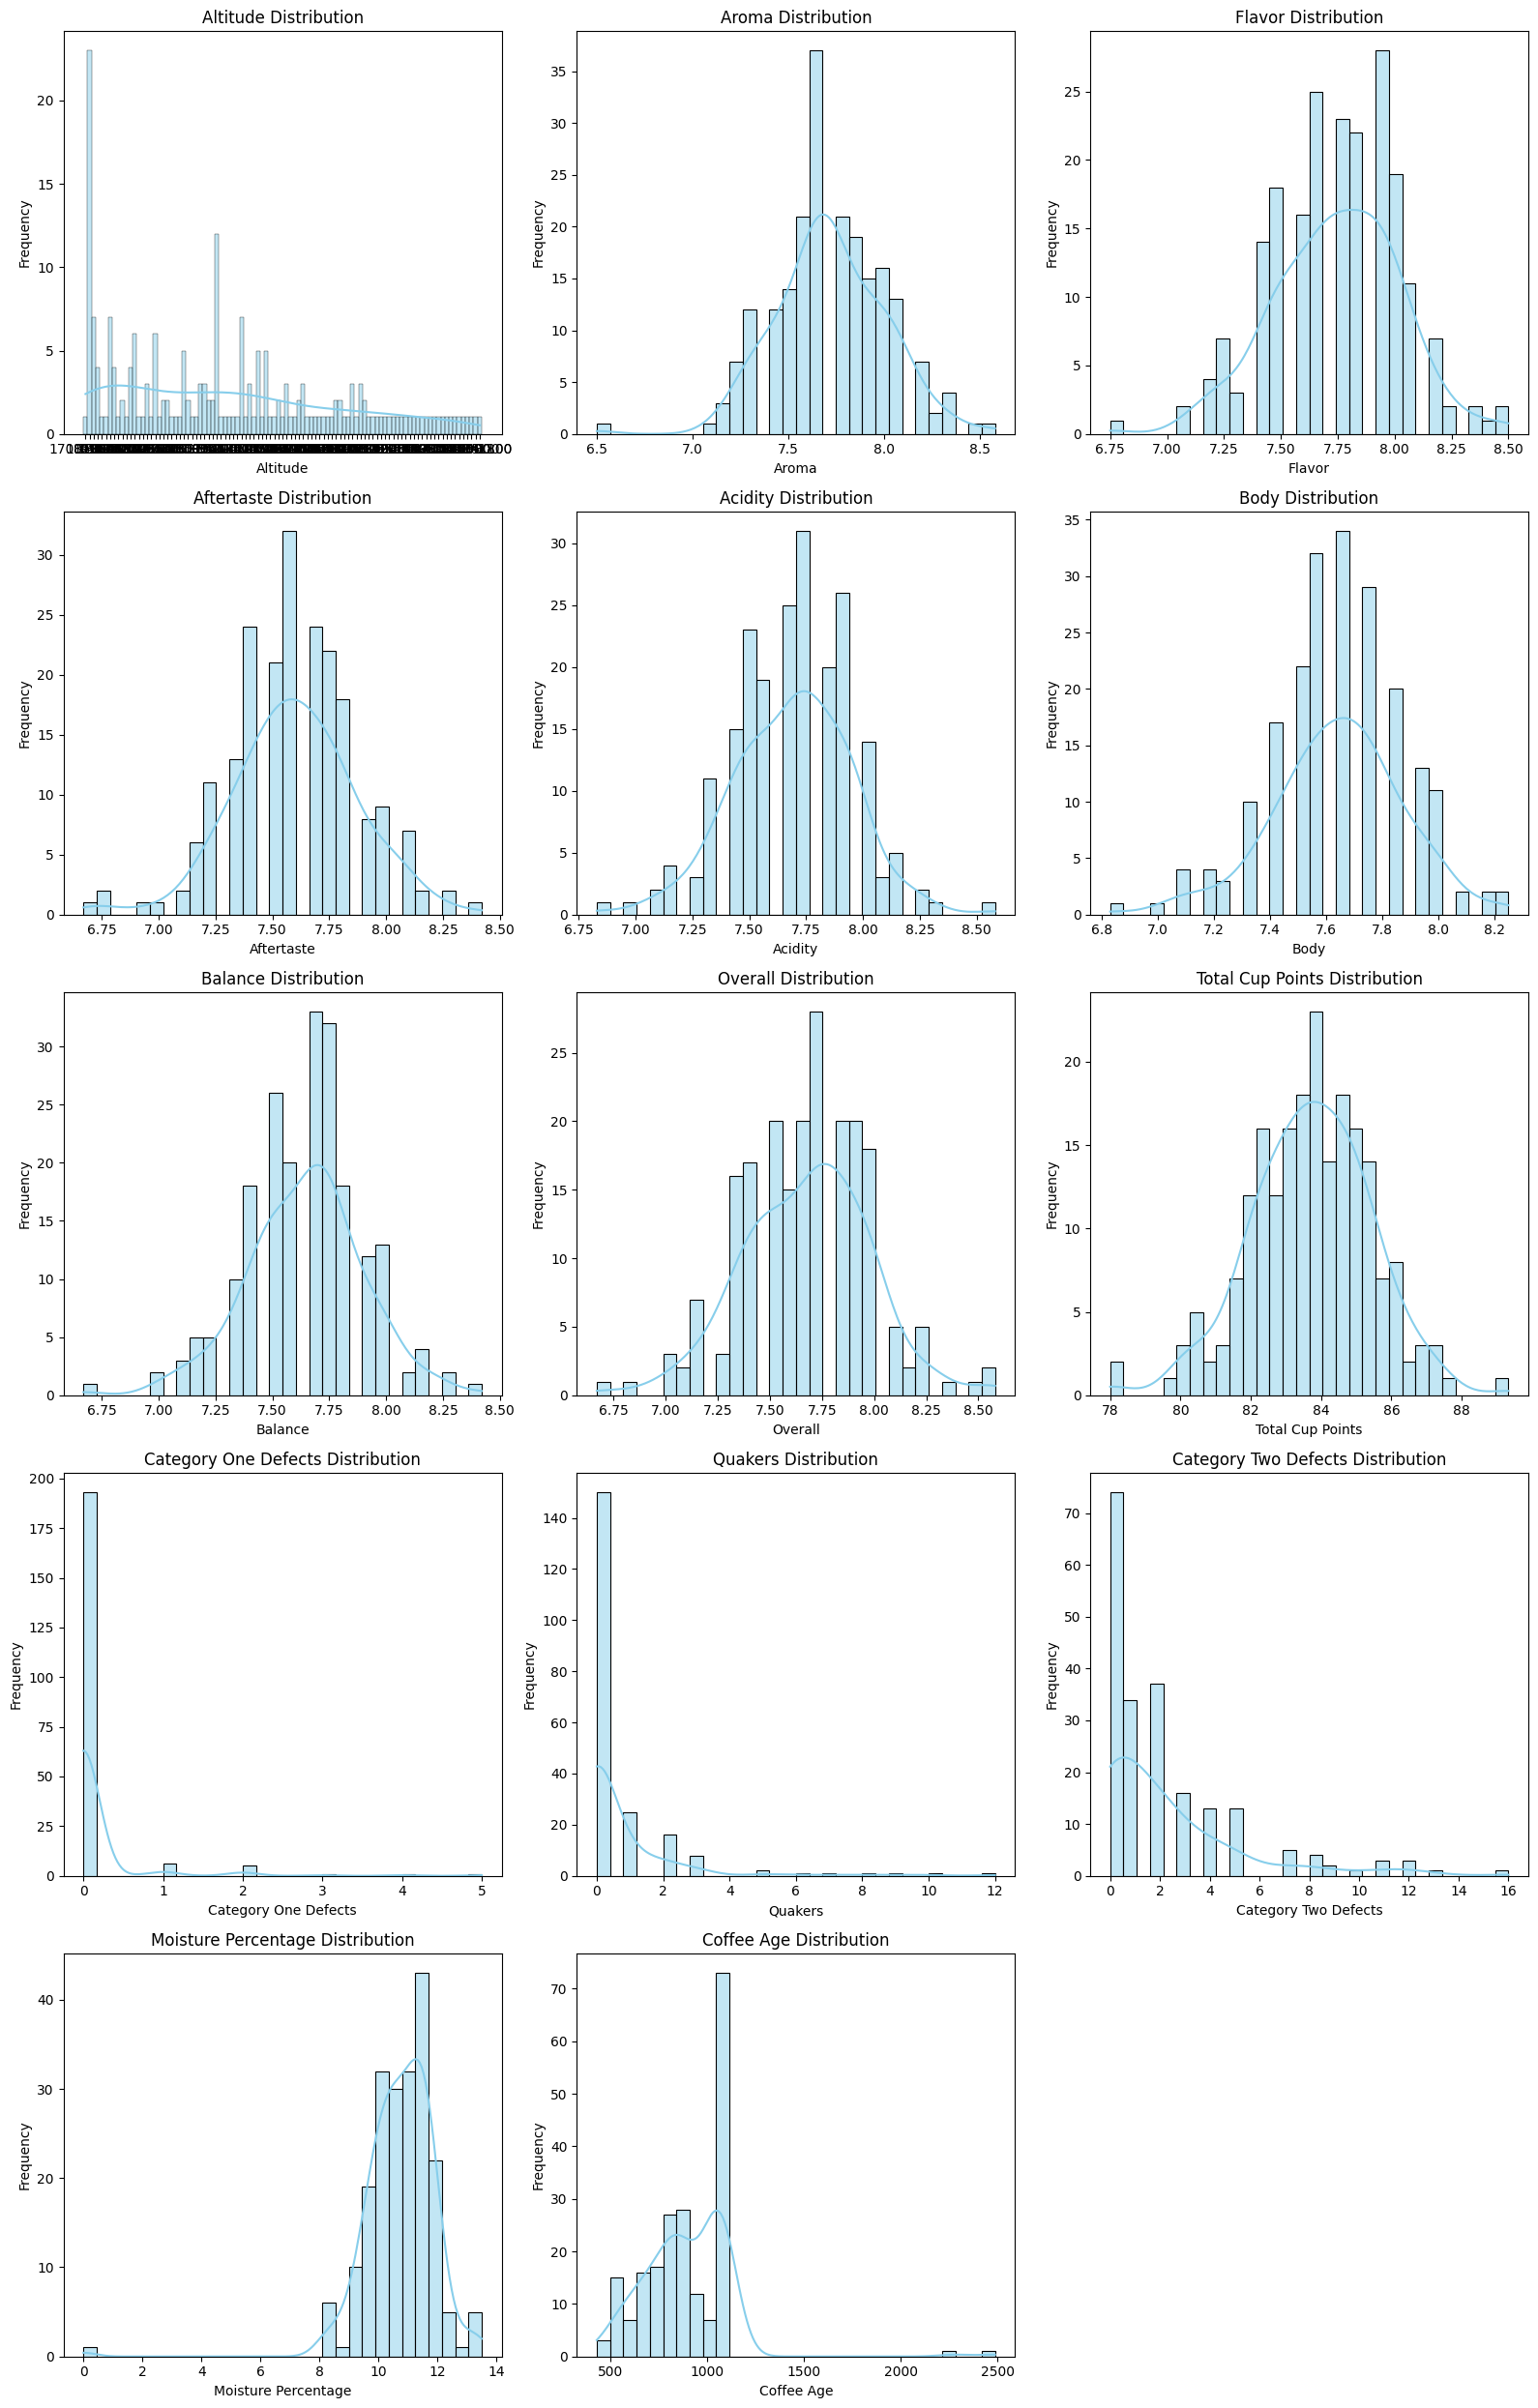

In [ ]:
numeric_cols = ['Altitude', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
                'Balance', 'Overall', 'Total Cup Points','Category One Defects', 'Quakers',
                'Category Two Defects', 'Moisture Percentage', 'Coffee Age']

# Set up the figure grid
plt.figure(figsize=(16, 25))
for i, col in enumerate(numeric_cols):
    plt.subplot(5, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

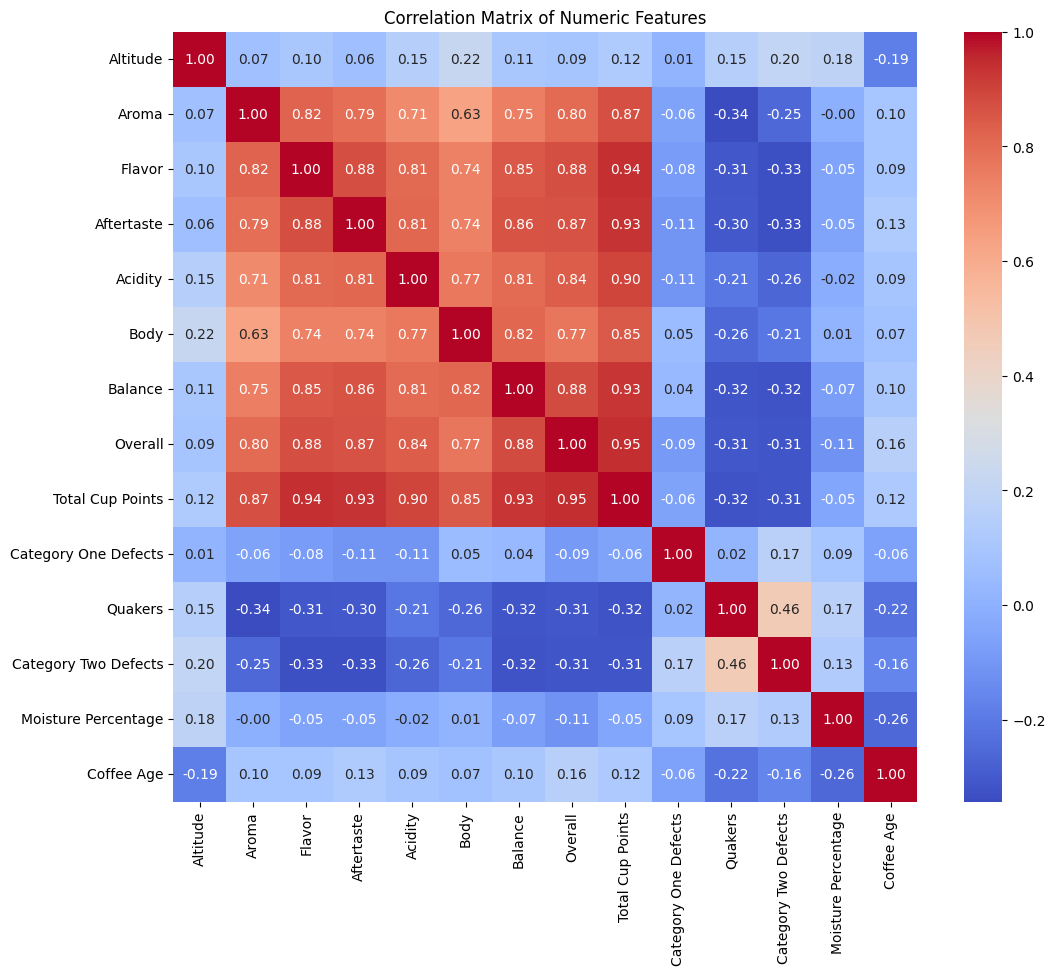

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_cleansing[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

#### Correlation Heatmap Analysis Summary

##### Strongly Correlated with `Total Cup Points`
These features show very high positive correlation:
- `Flavor` (0.94)  
- `Aftertaste` (0.93)  
- `Balance` (0.93)  
- `Overall` (0.95)  
- `Aroma` (0.87)  
- `Acidity` (0.90)  
- `Body` (0.85)  

These are directly used in calculating `Total Cup Points`, so high correlation is expected.

---

##### High Intercorrelation Between Sensory Attributes
- High correlation among `Flavor`, `Aftertaste`, `Balance`, `Overall`, etc.  
May indicate multicollinearity — consider PCA or feature selection.

---

##### Weak or No Correlation
- `Altitude`, `Category One Defects`, `Coffee Age`, and `Moisture Percentage` show low or near-zero correlation with cup scores  
Not predictive for score but may be useful for clustering or grouping.

### 3.2 Sensory Scores vs. Total Cup Points

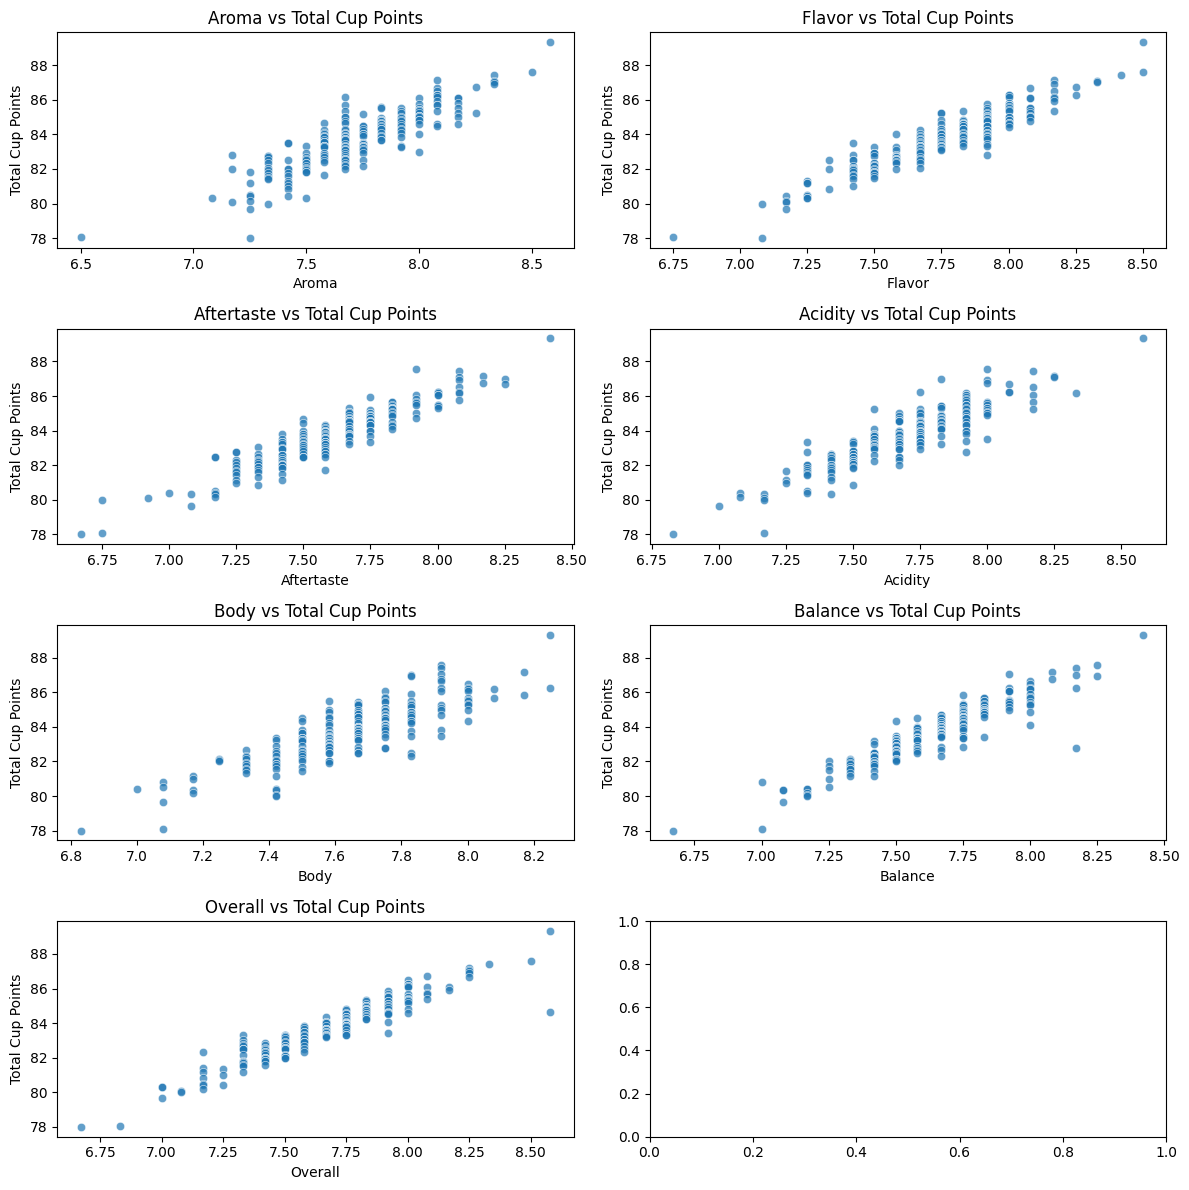

In [ ]:
sensory = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall']
fig, axes = plt.subplots(nrows=len(sensory) // 2 + (len(sensory) % 2), ncols=2, figsize=(12, 12))  # 2 columns
axes = axes.flatten()  # Flatten to easily iterate

for i, col in enumerate(sensory):
    sns.scatterplot(data=df_cleansing, x=col, y='Total Cup Points', alpha=0.7, ax=axes[i])
    axes[i].set_title(f'{col} vs Total Cup Points')

plt.tight_layout()  # Adjust spacing between plots
plt.show()

#### Conclusion
- All sensory attributes are positively correlated with the `Total Cup Points`

- `Overall`, `Flavor`, `Aftertaste`, and `Balance` are the strongest contributors

- This confirms that `Total Cup Points` is a derived score based on these features and should not be used as a target in a predictive model if these sensory features are used as input

### 3.3 Geospatial Analysis of Coffee

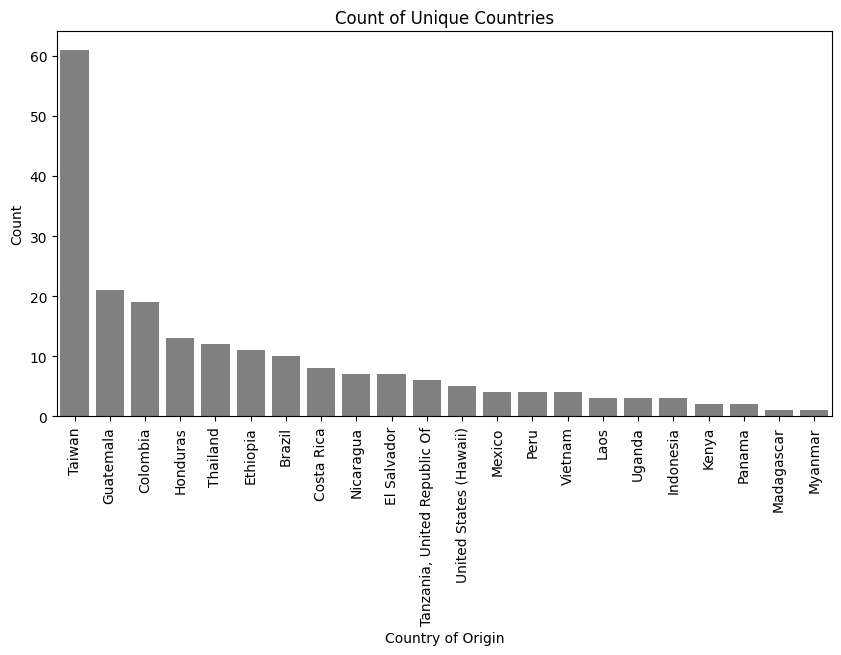

In [ ]:
df_count = df_cleansing['Country of Origin'].value_counts().reset_index()
df_count.columns = ['Country of Origin', 'Count']

plt.figure(figsize=(10, 5))
sns.barplot(x=df_count['Country of Origin'], y=df_count['Count'], color='gray')
plt.title('Count of Unique Countries')
plt.xlabel('Country of Origin')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

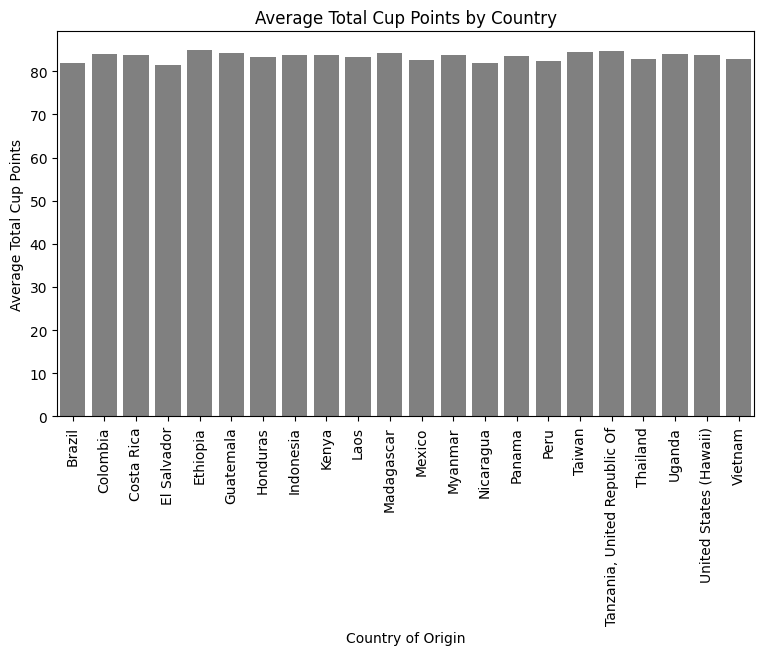

In [ ]:
df_grouped = df_cleansing.groupby('Country of Origin')['Total Cup Points'].mean().reset_index()

# Choropleth Map
fig = px.choropleth(
    df_grouped,
    locations='Country of Origin',
    locationmode='country names',
    color='Total Cup Points',
    hover_name='Country of Origin',
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Average Total Cup Points by Country'
)
fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor="LightSteelBlue"
)
fig.show()

# Bar Plot
plt.figure(figsize=(9, 5))
sns.barplot(
    data=df_grouped,
    x='Country of Origin',
    y='Total Cup Points',
    color='gray'
)
plt.title('Average Total Cup Points by Country')
plt.xlabel('Country of Origin')
plt.ylabel('Average Total Cup Points')
plt.xticks(rotation=90)
plt.show()


### 3.4 Altitude Distribution and Its Influence on Quality

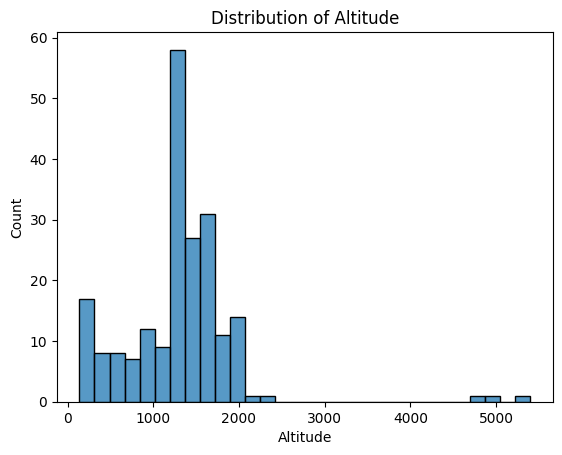

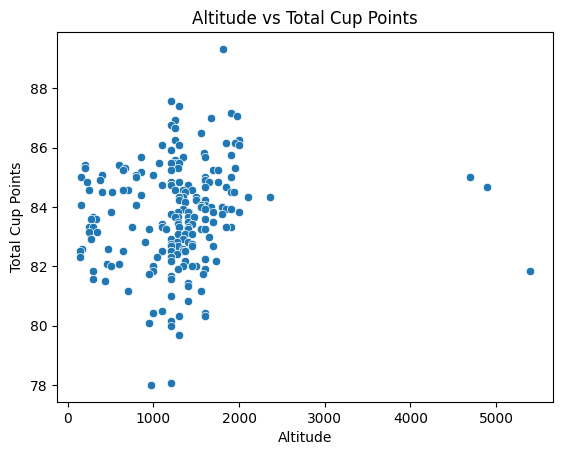

In [ ]:
# Check distribution
sns.histplot(df_cleansing['Altitude'], bins=30)
plt.title("Distribution of Altitude")
plt.show()

# Relationship with Total Cup Points
sns.scatterplot(data=df_cleansing, x='Altitude', y='Total Cup Points')
plt.title("Altitude vs Total Cup Points")
plt.show()

In [ ]:
# Sort by altitude to see high outliers
df_cleansing.sort_values(by='Altitude', ascending=False).head(5)

,Country of Origin,Altitude,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Coffee Age
182,Vietnam,5400,Pulped natural / honey,7.50,7.50,7.25,7.42,7.42,7.42,7.33,81.83,11.2,0,0,green,4,829
60,Guatemala,4895,Natural / Dry,7.83,8.00,7.67,7.83,7.75,7.75,7.83,84.67,10.9,0,3,yellow-green,2,868
47,Guatemala,4700,Washed / Wet,7.67,8.00,7.75,7.92,8.00,7.83,7.83,85.00,11.3,0,0,green,4,783
76,Ethiopia,2361,Natural / Dry,7.83,7.75,7.58,7.92,8.00,7.50,7.75,84.33,11.0,0,5,yellow-green,4,991
78,Colombia,2100,Washed / Wet,7.75,7.75,7.75,7.75,7.83,7.67,7.83,84.33,11.6,0,0,green,1,860


### 3.5 Moisture Percentage Analysis

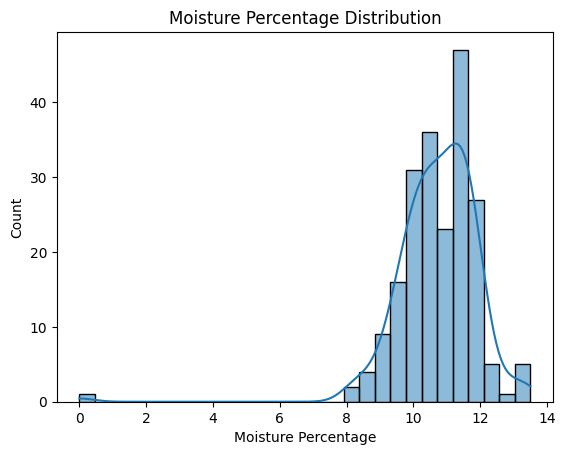

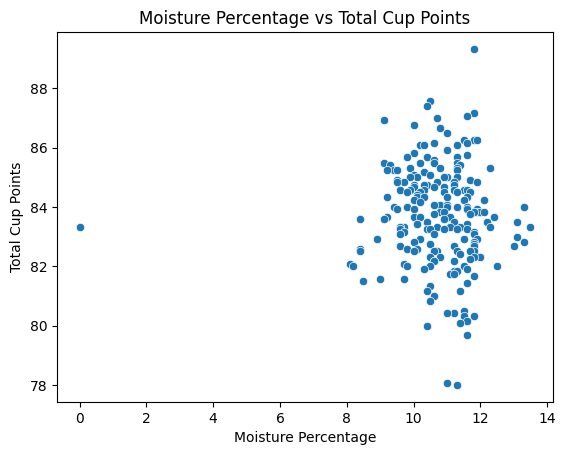

In [ ]:
sns.histplot(df_cleansing['Moisture Percentage'], kde=True)
plt.title("Moisture Percentage Distribution")
plt.show()

# Relationship with Total Cup Points
sns.scatterplot(data=df_cleansing, x='Moisture Percentage', y='Total Cup Points')
plt.title("Moisture Percentage vs Total Cup Points")
plt.show()

In [ ]:
# Sort by Moisture Percentage to see high outliers
df_cleansing.sort_values(by='Moisture Percentage').head(5)

,Country of Origin,Altitude,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Coffee Age
125,Costa Rica,1850,Washed / Wet,7.58,7.75,7.42,7.67,7.50,7.75,7.67,83.33,0.0,0,0,green,3,838
173,Taiwan,460,Pulped natural / honey,7.33,7.42,7.42,7.50,7.42,7.50,7.50,82.08,8.1,0,0,greenish,3,1100
174,Taiwan,500,Washed / Wet,7.50,7.58,7.42,7.42,7.25,7.42,7.42,82.00,8.2,0,0,green,1,1100
110,Taiwan,325,Natural / Dry,7.58,7.67,7.50,7.75,7.75,7.67,7.67,83.58,8.4,0,0,green,0,1100
162,Taiwan,139,Washed / Wet,7.42,7.42,7.58,7.42,7.58,7.50,7.58,82.50,8.4,0,0,green,2,1100


### 3.6 Coffee Age vs. Quality

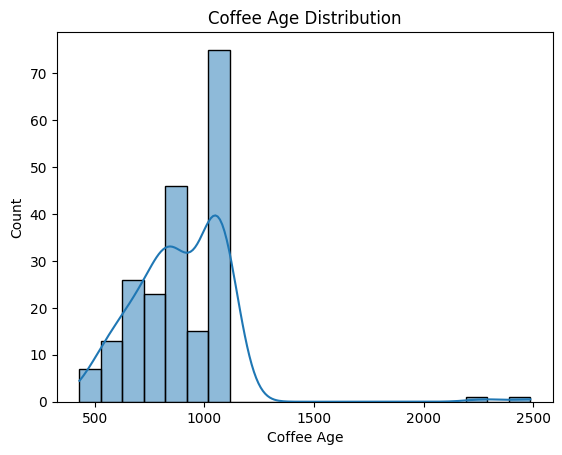

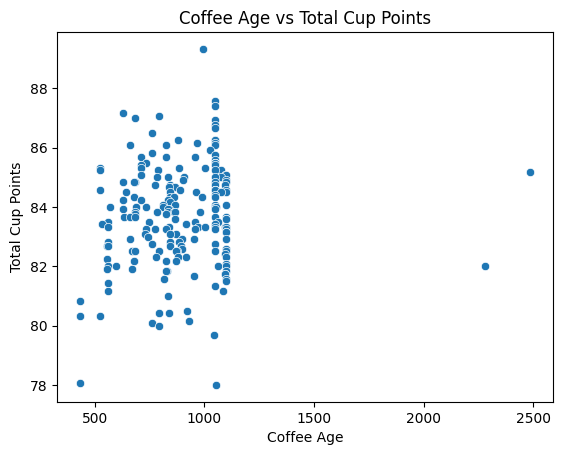

In [ ]:
# Check distribution
sns.histplot(df_cleansing['Coffee Age'], kde=True)
plt.title("Coffee Age Distribution")
plt.show()

# Relationship with Total Cup Points
sns.scatterplot(data=df_cleansing, x='Coffee Age', y='Total Cup Points')
plt.title("Coffee Age vs Total Cup Points")
plt.show()

In [ ]:
# Sort by Coffee Age to see high outliers
df_cleansing.sort_values(by='Coffee Age', ascending=False).head(5)

,Country of Origin,Altitude,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Coffee Age
39,Taiwan,850,Washed / Wet,7.75,7.92,7.75,8.00,7.83,7.92,8.00,85.17,10.3,0,0,bluish-green,0,2487
176,Costa Rica,1500,Washed / Wet,7.42,7.42,7.42,7.33,7.58,7.33,7.50,82.00,10.5,1,2,green,8,2278
62,Taiwan,250,Pulped natural / honey,7.83,7.83,7.75,7.75,7.75,7.75,7.92,84.58,9.6,0,0,greenish,0,1100
50,Taiwan,230,Natural / Dry,8.00,8.00,7.75,7.75,7.67,7.75,7.92,84.83,9.7,0,0,brownish,0,1100
69,Taiwan,520,Pulped natural / honey,7.75,7.92,7.83,7.75,7.75,7.75,7.75,84.50,11.3,0,0,bluish-green,0,1100


### 3.7 Coffee Color Distribution

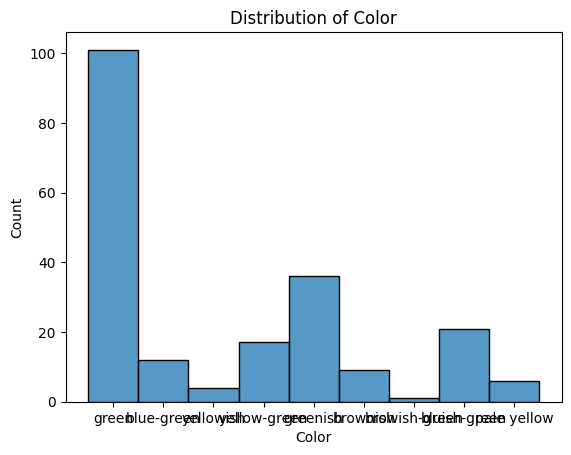

In [ ]:
sns.histplot(df_cleansing['Color'], bins=30)
plt.title("Distribution of Color")
plt.show()

### 3.8 Outlier Detection and Removal

To improve clustering performance and ensure meaningful groupings, we removed extreme outliers based on domain knowledge and visual inspection of distributions:

- `Altitude < 3000`: Most specialty coffees are grown at altitudes below 3000 meters. Extremely high values may indicate data entry errors or rare anomalies not representative of general trends.
- `Moisture Percentage > 0.0`: Coffee beans must retain some measurable moisture content; a value of zero is physically unrealistic and likely indicates missing or corrupted data.
- `Coffee Age < 1500`: Coffee Age represents the number of days between harvest and expiration. Values above approximately 4 years (1500 days) may reflect inaccurate records, long storage periods, or inconsistencies that could distort clustering.

These filters help ensure that our dataset reflects realistic, high-quality coffee data while reducing noise and improving the reliability of unsupervised analysis.


In [ ]:
df_cleansing2 = df_cleansing.copy()

In [ ]:
df_cleansing2 = df_cleansing2[df_cleansing2['Altitude'] < 3000]
df_cleansing2 = df_cleansing2[df_cleansing2['Moisture Percentage'] > 0.0]
df_cleansing2 = df_cleansing2[df_cleansing2['Coffee Age'] < 1500]

In [ ]:
df_cleansing2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country of Origin,201,22,Taiwan,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Altitude,201.0,NaN,NaN,NaN,1227.323383,484.829166,139.0,1000.0,1300.0,1550.0,2361.0
Processing Method,201,10,Washed / Wet,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aroma,201.0,NaN,NaN,NaN,7.72393,0.290395,6.5,7.58,7.67,7.92,8.58
Flavor,201.0,NaN,NaN,NaN,7.744129,0.280885,6.75,7.58,7.75,7.92,8.5
Aftertaste,201.0,NaN,NaN,NaN,7.601443,0.277889,6.67,7.42,7.58,7.75,8.42
Acidity,201.0,NaN,NaN,NaN,7.690149,0.259824,6.83,7.5,7.67,7.83,8.58
Body,201.0,NaN,NaN,NaN,7.639751,0.234332,6.83,7.5,7.67,7.75,8.25
Balance,201.0,NaN,NaN,NaN,7.643383,0.25739,6.67,7.5,7.67,7.75,8.42
Overall,201.0,NaN,NaN,NaN,7.676318,0.308474,6.67,7.5,7.67,7.92,8.58


## 4. Preprocessing and Scaling the data

### Reasons for Dropping Specific Columns from Clustering

* `Country of Origin`: Although it may relate to coffee quality through geographic or agricultural influences, it is a high-level categorical variable that could overshadow intrinsic sensory attributes. Including it might bias clustering results toward regional groupings rather than true product characteristics.

* `Color`: This feature is highly imbalanced, with most entries falling into just a few categories. Its uneven distribution and potential for subjective labeling make it unreliable for meaningful cluster separation.

* `Total Cup Points`: Since this is a derived score calculated from other sensory attributes, it has been set aside for later interpretation of clusters. Including it during clustering could lead to leakage, as it essentially represents the outcome of the clustering process itself.


In [ ]:
df_cleansing2.columns

Index(['Country of Origin', 'Altitude', 'Processing Method', 'Aroma', 'Flavor',
       'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Coffee Age'],
      dtype='object')

In [ ]:
sensory_and_defect_features = ['Altitude', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
                'Balance', 'Overall', 'Category One Defects', 'Quakers',
                'Category Two Defects', 'Moisture Percentage', 'Coffee Age']

categorical_columns = ['Processing Method']

columns_to_drop = ['Country of Origin', 'Color']

Total_cup_point = ['Total Cup Points']

### 4.1 Categorical Encoding

In [ ]:
df_cleansing2['Processing Method'].value_counts()

,count
Processing Method,
Washed / Wet,125
Natural / Dry,45
Pulped natural / honey,24
Double Anaerobic Washed,1
"Honey,Mossto",1
Semi Washed,1
Double Carbonic Maceration / Natural,1
Wet Hulling,1
Anaerobico 1000h,1


In [ ]:
dummy_variables = pd.get_dummies(df_cleansing2, columns=['Processing Method'], prefix='Process', drop_first=False)

# Check resulting columns
dummy_variables.columns

Index(['Country of Origin', 'Altitude', 'Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Overall', 'Total Cup Points',
       'Moisture Percentage', 'Category One Defects', 'Quakers', 'Color',
       'Category Two Defects', 'Coffee Age', 'Process_Anaerobico 1000h',
       'Process_Double Anaerobic Washed',
       'Process_Double Carbonic Maceration / Natural', 'Process_Honey,Mossto',
       'Process_Natural / Dry', 'Process_Pulped natural / honey',
       'Process_SEMI-LAVADO', 'Process_Semi Washed', 'Process_Washed / Wet',
       'Process_Wet Hulling'],
      dtype='object')

### 4.2 Scale Numeric Features

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numeric features
scaled_data = scaler.fit_transform(df_cleansing2[sensory_and_defect_features])

# Convert back to a DataFrame for convenience
scaled_df = pd.DataFrame(scaled_data, columns=sensory_and_defect_features)

# Keep other columns like Processing Method or Cluster later
scaled_df.index = df_cleansing2.index

In [ ]:
# Combine scaled numeric and encoded categorical data
df_final = pd.concat([scaled_df, dummy_variables.drop(columns=sensory_and_defect_features)], axis=1)

df_final = df_final.drop(columns_to_drop, axis=1)

# Preview final data
df_final.head()

,Altitude,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Overall,Category One Defects,Quakers,...,Process_Anaerobico 1000h,Process_Double Anaerobic Washed,Process_Double Carbonic Maceration / Natural,"Process_Honey,Mossto",Process_Natural / Dry,Process_Pulped natural / honey,Process_SEMI-LAVADO,Process_Semi Washed,Process_Washed / Wet,Process_Wet Hulling
0,1.215158,2.955315,2.697752,2.952979,3.433373,2.610709,3.024813,2.936835,-0.225423,-0.405133,...,False,True,False,False,False,False,False,False,False,False
1,-0.056497,2.679139,2.697752,1.149208,1.195519,1.198934,2.362687,2.676846,-0.225423,-0.405133,...,False,False,False,False,False,False,False,False,True,False
2,0.150276,2.092267,2.412227,1.726415,1.851442,1.198934,2.051099,2.124371,-0.225423,-0.405133,...,False,False,False,False,False,False,False,True,False,False
3,1.390915,1.229220,1.519960,2.051094,2.160111,2.268461,1.700561,1.864382,-0.225423,-0.405133,...,False,False,False,False,False,False,False,False,True,False
4,1.545995,2.092267,2.091011,1.726415,2.160111,1.198934,1.077384,1.864382,-0.225423,0.775037,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
df_final.columns

Index(['Altitude', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Overall', 'Category One Defects', 'Quakers',
       'Category Two Defects', 'Moisture Percentage', 'Coffee Age',
       'Total Cup Points', 'Process_Anaerobico 1000h',
       'Process_Double Anaerobic Washed',
       'Process_Double Carbonic Maceration / Natural', 'Process_Honey,Mossto',
       'Process_Natural / Dry', 'Process_Pulped natural / honey',
       'Process_SEMI-LAVADO', 'Process_Semi Washed', 'Process_Washed / Wet',
       'Process_Wet Hulling'],
      dtype='object')

### 4.3 Finding the Optimal k using the Elbow Method

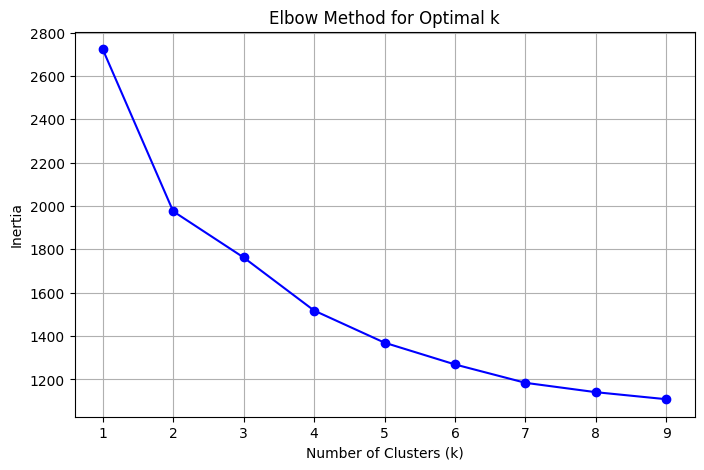

In [ ]:
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_final.drop(columns=Total_cup_point))
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(K)
plt.grid(True)
plt.show()

### 4.4 KMeans

In [ ]:
# Set optimal k value and apply KMeans
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Make a copy of the dataframe and assign cluster labels
data_with_cluster = df_final.copy()
data_with_cluster['cluster'] = kmeans.fit_predict(data_with_cluster.drop(columns=Total_cup_point))

# Preview data with cluster labels
data_with_cluster[['cluster'] + [col for col in data_with_cluster.columns if col != 'cluster']].head()

,cluster,Altitude,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Overall,Category One Defects,...,Process_Anaerobico 1000h,Process_Double Anaerobic Washed,Process_Double Carbonic Maceration / Natural,"Process_Honey,Mossto",Process_Natural / Dry,Process_Pulped natural / honey,Process_SEMI-LAVADO,Process_Semi Washed,Process_Washed / Wet,Process_Wet Hulling
0,2,1.215158,2.955315,2.697752,2.952979,3.433373,2.610709,3.024813,2.936835,-0.225423,...,False,True,False,False,False,False,False,False,False,False
1,2,-0.056497,2.679139,2.697752,1.149208,1.195519,1.198934,2.362687,2.676846,-0.225423,...,False,False,False,False,False,False,False,False,True,False
2,2,0.150276,2.092267,2.412227,1.726415,1.851442,1.198934,2.051099,2.124371,-0.225423,...,False,False,False,False,False,False,False,True,False,False
3,2,1.390915,1.229220,1.519960,2.051094,2.160111,2.268461,1.700561,1.864382,-0.225423,...,False,False,False,False,False,False,False,False,True,False
4,2,1.545995,2.092267,2.091011,1.726415,2.160111,1.198934,1.077384,1.864382,-0.225423,...,False,False,False,True,False,False,False,False,False,False


### 4.5 PCA Visualization for Coffee Clusters

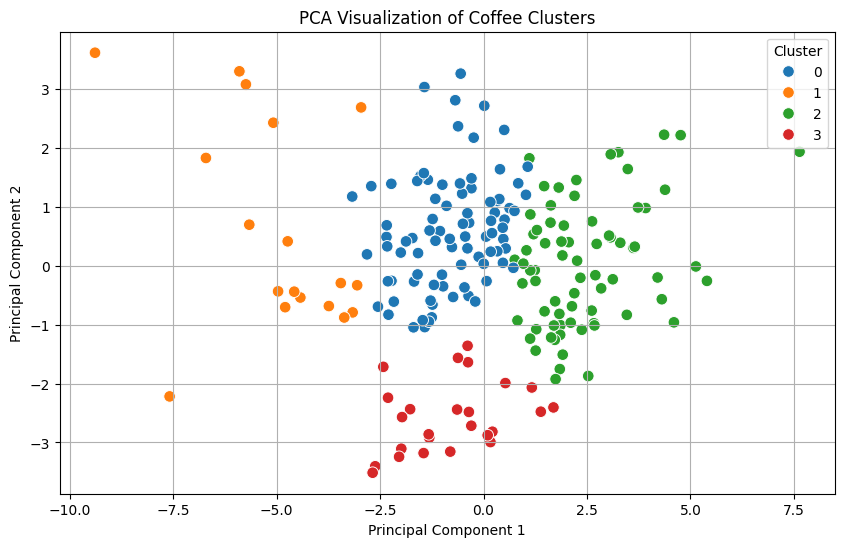

In [ ]:
# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)

# Drop 'Total Cup Points' and 'cluster' column before applying PCA
pca_components = pca.fit_transform(data_with_cluster.drop(columns=['cluster', 'Total Cup Points']))

# Create a DataFrame for PCA components
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = data_with_cluster['cluster'].values

# Plot PCA components with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='cluster', palette='tab10', s=70)
plt.title('PCA Visualization of Coffee Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Cluster Means for Sensory and Defect Features:
         Altitude     Aroma    Flavor  Aftertaste   Acidity      Body  \
cluster                                                                 
0        0.406122 -0.303392 -0.309808   -0.357150 -0.239705 -0.134243   
1       -0.001932 -1.538285 -1.860738   -1.732817 -1.713263 -1.762466   
2        0.118025  0.884001  0.930073    0.941274  0.858447  0.838860   
3       -1.735579 -0.394690 -0.273138   -0.234645 -0.414193 -0.685144   

          Balance   Overall  Category One Defects   Quakers  \
cluster                                                       
0       -0.261814 -0.346275              0.242898 -0.075783   
1       -1.783174 -1.759207             -0.225423  1.725730   
2        0.938359  0.961645             -0.155500 -0.200242   
3       -0.517950 -0.311721             -0.225423 -0.405133   

         Category Two Defects  Moisture Percentage  Coffee Age  
cluster                                                         
0    

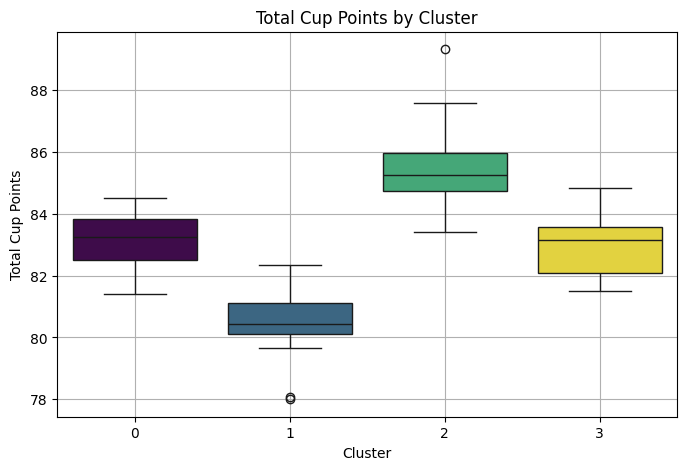

In [ ]:
# Group data by clusters and calculate the mean for each feature
cluster_means = data_with_cluster.groupby('cluster')[sensory_and_defect_features].mean()

# Print the means of sensory and defect features for each cluster
print("Cluster Means for Sensory and Defect Features:")
print(cluster_means)

# Compare clusters with 'Total Cup Points'
# This helps us understand how each cluster relates to coffee quality
cluster_total_points = data_with_cluster.groupby('cluster')['Total Cup Points'].mean()

# Print the average Total Cup Points per cluster
print("\nCluster Total Cup Points:")
print(cluster_total_points)

# Visualize the relationship between clusters and Total Cup Points
plt.figure(figsize=(8, 5))
sns.boxplot(x='cluster', y='Total Cup Points', hue='cluster', data=data_with_cluster, palette='viridis', legend=False)
plt.title('Total Cup Points by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Cup Points')
plt.grid(True)
plt.show()

#### Cluster Quality Summary (Based on Total Cup Points)
| Cluster | Avg. Total Cup Points | Quality Tier        | Notes                                                                |
| ------- | --------------------- | ------------------- | -------------------------------------------------------------------- |
| 0       | \~83.1                | Mid–High Quality    | Good balance, clean profile, possibly consistent but not top-tier    |
| 1       | \~80.4                | **Lowest Quality**  | Lower across most sensory scores, potentially more defects           |
| 2       | \~85.4                | **Highest Quality** | Outstanding sensory scores, likely includes premium/specialty coffee |
| 3       | \~83.0                | Mid–High Quality    | Similar to Cluster 0, may differ in body or acidity characteristics  |

#### Boxplot: Total Cup Points by Cluster

* Clearly shows **Cluster 2** outperforming all others.
* **Cluster 1** is distinctly lower, indicating a valid separation of lower-quality samples.
* Clusters 0 and 3 overlap but may reflect nuanced differences in processing or origin.

---

### Interpretation and Use

* **Cluster 2** coffees could be marketed as **premium** or **specialty-grade**.
* **Cluster 1** may be deprioritized or targeted for improvement in sourcing or processing.
* **Clusters 0 and 3** offer opportunities for **market segmentation** (e.g. balance-focused vs acidity-focused profiles).

---

### Conclusion

The clustering model effectively differentiated coffee samples into **quality-based segments** using sensory and physical features. This enables **targeted quality control**, **marketing strategies**, and **supply chain decisions** based on data-driven insights.



### 4.6 Feature Importance for Cluster Prediction

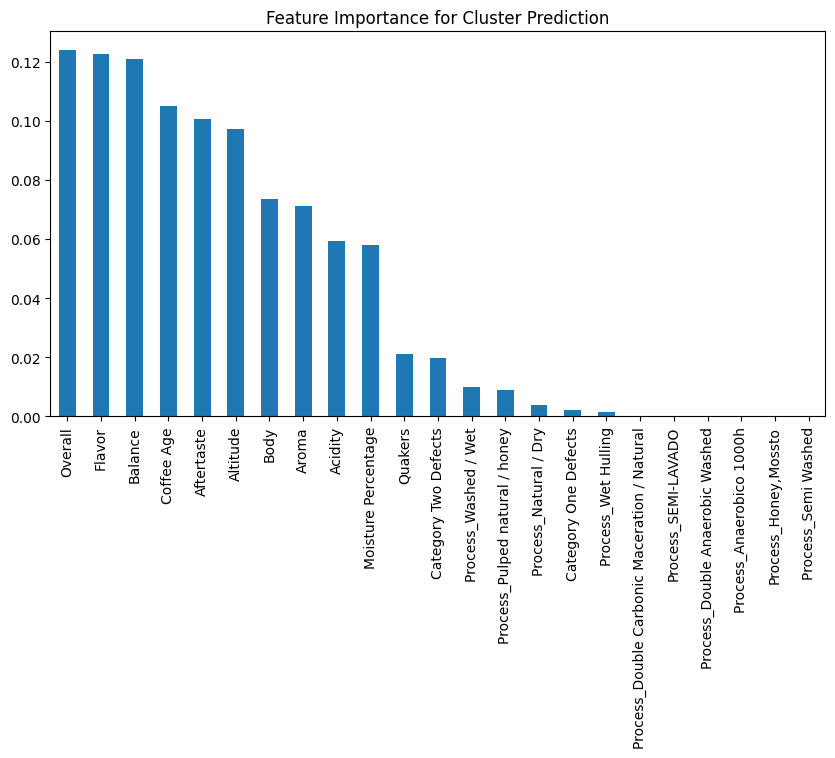

In [ ]:
X = data_with_cluster.drop(columns=['cluster','Total Cup Points'])
y = data_with_cluster['cluster']
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Feature Importance for Cluster Prediction")
plt.show()

In [ ]:
df['cluster'] = data_with_cluster['cluster']

df[['cluster'] + df.columns.tolist()].head()

,cluster,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,...,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact,Coffee Age,cluster
0,2.0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,...,0,0,green,3,2023-09-21,Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901,993,2.0
1,2.0,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,...,0,0,blue-green,0,2023-11-15,Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612",1048,2.0
2,2.0,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,...,0,0,yellowish,2,2023-11-15,Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612",1048,2.0
3,2.0,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,...,0,0,green,0,2023-09-21,Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901,628,2.0
4,2.0,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,...,0,2,yellow-green,2,2024-03-05,Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901,794,2.0


### **Justification for Choosing KMeans Clustering**

KMeans clustering was selected for this project based on several key considerations:

* **Unsupervised Learning Fit:** The dataset lacks explicit quality labels beyond aggregated sensory scores (such as Total Cup Points). KMeans, as an unsupervised technique, is well-suited for uncovering latent patterns and natural groupings in such data.

* **Interpretability:** KMeans assigns each sample to a single, distinct cluster, enabling clear comparisons across groups. Visualization of cluster assignments—such as boxplots of Total Cup Points—demonstrates that the model effectively distinguishes coffee samples with different quality profiles.

* **Scalability and Efficiency:** KMeans is computationally efficient and handles both numerical and encoded categorical features well. The relatively small and structured feature set in this dataset makes KMeans a practical choice for rapid experimentation and iteration.

* **Actionable Segmentation:** Cluster analysis reveals groups with distinct quality characteristics. For example, one cluster may contain coffees with consistently higher Total Cup Points, providing actionable targets for producers or marketers interested in premium segments.

* **Validation via Dimensionality Reduction:** Applying Principal Component Analysis (PCA) confirmed that the clusters remain well-separated even in reduced dimensions, reinforcing the validity of the segmentation. Feature importance analysis further identified attributes like Overall, Flavor, and Balance as key drivers of cluster differentiation.

**In summary, KMeans proved effective in segmenting unlabeled coffee data by quality-related features, yielding interpretable and actionable clusters that reflect meaningful differences in coffee quality.**